# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('./input/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
media_idade_mae = sinasc_raw.groupby('munResNome')['IDADEMAE'].mean()
media_idade_mae

munResNome
Alta Floresta D'Oeste        25.991826
Alto Alegre dos Parecis      24.844156
Alto Paraíso                 24.960177
Alvorada D'Oeste             25.770732
Ariquemes                    25.607866
Buritis                      25.559177
Cabixi                       26.037500
Cacaulândia                  25.546667
Cacoal                       26.890102
Campo Novo de Rondônia       24.825301
Candeias do Jamari           25.243323
Castanheiras                 27.281250
Cerejeiras                   27.240506
Chupinguaia                  25.333333
Colorado do Oeste            27.602804
Corumbiara                   24.716535
Costa Marques                24.412017
Cujubim                      24.482927
Espigão D'Oeste              26.093333
Governador Jorge Teixeira    24.401786
Guajará-Mirim                25.462228
Itapuã do Oeste              26.064220
Jaru                         25.982974
Ji-Paraná                    26.361137
Machadinho D'Oeste           25.480000
Ministro Andre

In [4]:
media_idade_pai = sinasc_raw.groupby('munResNome')['IDADEPAI'].mean()
media_idade_pai

munResNome
Alta Floresta D'Oeste        29.548701
Alto Alegre dos Parecis      29.179104
Alto Paraíso                 28.833333
Alvorada D'Oeste             30.757282
Ariquemes                    32.466667
Buritis                      30.812500
Cabixi                       34.333333
Cacaulândia                  36.333333
Cacoal                       30.931854
Campo Novo de Rondônia       30.500000
Candeias do Jamari           29.894737
Castanheiras                 30.392857
Cerejeiras                   31.652778
Chupinguaia                  29.629630
Colorado do Oeste            34.354839
Corumbiara                   32.470588
Costa Marques                30.613636
Cujubim                      31.400000
Espigão D'Oeste              31.198113
Governador Jorge Teixeira    29.222222
Guajará-Mirim                30.470588
Itapuã do Oeste              42.500000
Jaru                         32.197183
Ji-Paraná                    31.132239
Machadinho D'Oeste           31.326923
Ministro Andre

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [5]:
aniversario = sinasc_raw[sinasc_raw['DTNASC'] == '2019-04-04']
peso_medio_sexo_esc = aniversario.groupby(['SEXO', 'ESCMAE'])['PESO'].mean()
df_peso_medio = peso_medio_sexo_esc.reset_index()
df_peso_medio.columns = ['Sexo', 'Escolaridade Mãe', 'Peso Médio Bebê (g)']
df_peso_medio

,Sexo,Escolaridade Mãe,Peso Médio Bebê (g)
0,Feminino,12 anos ou mais,3245.666667
1,Feminino,4 a 7 anos,2835.500000
2,Feminino,8 a 11 anos,3220.200000
3,Masculino,12 anos ou mais,3327.222222
4,Masculino,4 a 7 anos,3453.625000
5,Masculino,8 a 11 anos,3243.387097


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [6]:
df = sinasc_raw.dropna(subset=['munResNome', 'munResTipo']).loc[~(sinasc_raw['munResNome'] == 'Município ignorado - RO')]

df_min_municipio = df['munResNome'].value_counts().idxmin()
df_min_municipio_bebe = df[df['munResNome'] == df_min_municipio]

idade_media_mae = df_min_municipio_bebe['IDADEMAE'].mean()
idade_min_mae = df_min_municipio_bebe['IDADEMAE'].min()
idade_max_mae = df_min_municipio_bebe['IDADEMAE'].max()

idade_media_pai = df_min_municipio_bebe['IDADEPAI'].mean()
idade_min_pai = df_min_municipio_bebe['IDADEPAI'].min()
idade_max_pai = df_min_municipio_bebe['IDADEPAI'].max()

print(f'O Municipio com o menor numero de nascimentos em 2019 foi: {df_min_municipio}')

print('\nResultados idade da mãe desse municipio\n')
print(f'Idade média das mães {idade_media_mae}')
print(f'Idade mínima das mães {idade_min_mae}')
print(f'Idade máxima das mães {idade_max_mae}\n')

print('\nResultados idade do pai desse municipio\n')
print(f'Idade média do pai {idade_media_pai}')
print(f'Idade mínima do pai {idade_min_pai}')
print(f'Idade máxima do pai {idade_max_pai}')

O Municipio com o menor numero de nascimentos em 2019 foi: Castanheiras

Resultados idade da mãe desse municipio

Idade média das mães 27.28125
Idade mínima das mães 17
Idade máxima das mães 39


Resultados idade do pai desse municipio

Idade média do pai 30.392857142857142
Idade mínima do pai 17.0
Idade máxima do pai 43.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [7]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
df_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]
mais_bebe_marco = df_marco['munResNome'].value_counts().idxmax()
df_mais_bebe_marco = df_marco[df_marco['munResNome'] == mais_bebe_marco]

qtd_filhos_vivos_media = df_mais_bebe_marco['QTDFILVIVO'].mean() 
qtd_filhos_vivos_min = df_mais_bebe_marco['QTDFILVIVO'].min()
qtd_filhos_vivos_max = df_mais_bebe_marco['QTDFILVIVO'].max()

idade_media_pais = df_mais_bebe_marco[['IDADEPAI', 'IDADEMAE']].mean().mean()
idade_min_pais = df_mais_bebe_marco[['IDADEPAI', 'IDADEMAE']].min().min()
idade_max_pais = df_mais_bebe_marco[['IDADEPAI', 'IDADEMAE']].max().max()

print(f'O município que teve o maior numero de nascimentos em março foi: {mais_bebe_marco}\n')
print('\nResultado de quantidade de filhos vivos nesse município:\n')
print(f'Quantidade média de filhos vivos: {qtd_filhos_vivos_media}')
print(f'Quantidade mínima de filhos vivos: {qtd_filhos_vivos_min}')
print(f'Quantidade máxima de filhos vivos: {qtd_filhos_vivos_max}\n')

print('Resultado de idade dos pais nesse município:\n')
print(f'Idade média dos pais: {idade_media_pais}')
print(f'Idade mínima dos pais: {idade_min_pais}')
print(f'Idade máxima dos pais: {idade_max_pais}')

O município que teve o maior numero de nascimentos em março foi: Porto Velho


Resultado de quantidade de filhos vivos nesse município:

Quantidade média de filhos vivos: 1.2950558213716108
Quantidade mínima de filhos vivos: 0.0
Quantidade máxima de filhos vivos: 9.0

Resultado de idade dos pais nesse município:

Idade média dos pais: 30.612903225806456
Idade mínima dos pais: 14.0
Idade máxima dos pais: 62.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

1 - Municipios onde tiveram a maior quantidade de mãe e pai menores de idade no ano de 2019

In [8]:
total_maes_menores_idade = (sinasc_raw['IDADEMAE'] < 18).sum()
total_pais_menores_idade = (sinasc_raw['IDADEPAI'] < 18).sum()

maes_menores_idade = sinasc_raw[sinasc_raw['IDADEMAE'] < 18]['munResNome'].value_counts()
municipio_mais_maes_menores_idade = maes_menores_idade.idxmax()
numero_maes_menores_idade = maes_menores_idade.max()

pais_menores_idade = sinasc_raw[sinasc_raw['IDADEPAI'] < 18]['munResNome'].value_counts()
municipio_mais_pais_menores_idade = pais_menores_idade.idxmax()
numero_pais_menores_idade = pais_menores_idade.max()

print(f"Número total de mães menores de idade: {total_maes_menores_idade}")
print(f"Número total de pais menores de idade: {total_pais_menores_idade}")
print(f"Município onde mais tiveram mães menores de idade: {municipio_mais_maes_menores_idade} ({numero_maes_menores_idade} ocorrências)")
print(f"Município onde mais tiveram pais menores de idade: {municipio_mais_pais_menores_idade} ({numero_pais_menores_idade} ocorrências)")


Número total de mães menores de idade: 2097
Número total de pais menores de idade: 57
Município onde mais tiveram mães menores de idade: Porto Velho (664 ocorrências)
Município onde mais tiveram pais menores de idade: Pimenta Bueno (9 ocorrências)


2 - Quantidade de nascimentos de cada mês de 2019 separados pelo sexo

In [9]:
sinasc_raw['MES_NASCIMENTO'] = sinasc_raw['DTNASC'].dt.month
nascimentos_por_mes_sexo = sinasc_raw.groupby(['MES_NASCIMENTO', 'SEXO']).size().unstack()
nascimentos_por_mes_sexo['Total'] = nascimentos_por_mes_sexo.sum(axis=1)

meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
nascimentos_por_mes_sexo.rename(index=meses, inplace=True)
nascimentos_por_mes_sexo = nascimentos_por_mes_sexo.sort_values(by='Total', ascending=False)

print("Nascimentos por mês e sexo:")
print(nascimentos_por_mes_sexo)

Nascimentos por mês e sexo:
SEXO            Feminino  Masculino  Total
MES_NASCIMENTO                            
Março               1196       1260   2456
Abril               1164       1207   2371
Maio                1160       1204   2364
Setembro            1119       1238   2357
Outubro             1098       1172   2270
Janeiro             1088       1175   2263
Agosto              1081       1117   2198
Junho                998       1178   2176
Julho               1036       1124   2160
Novembro            1078       1070   2148
Dezembro            1027       1109   2136
Fevereiro           1093       1032   2125


<Figure size 1000x600 with 0 Axes>

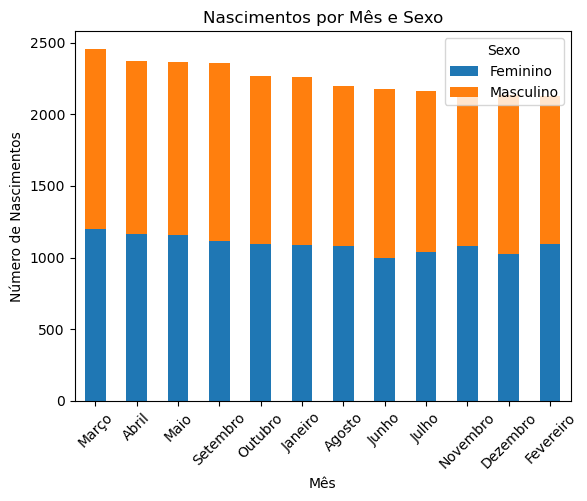

In [10]:
nascimentos_por_mes_sexo_sem_total = nascimentos_por_mes_sexo.drop(columns=['Total'])

plt.figure(figsize=(10, 6))
nascimentos_por_mes_sexo_sem_total.plot(kind='bar', stacked=True)
plt.title('Nascimentos por Mês e Sexo')
plt.xlabel('Mês')
plt.ylabel('Número de Nascimentos')
plt.xticks(rotation=45)
plt.legend(title='Sexo', loc='upper right')
plt.show()

3 - Tipo de parto mais realizado do ano de 2019 considerando todos os municipios.

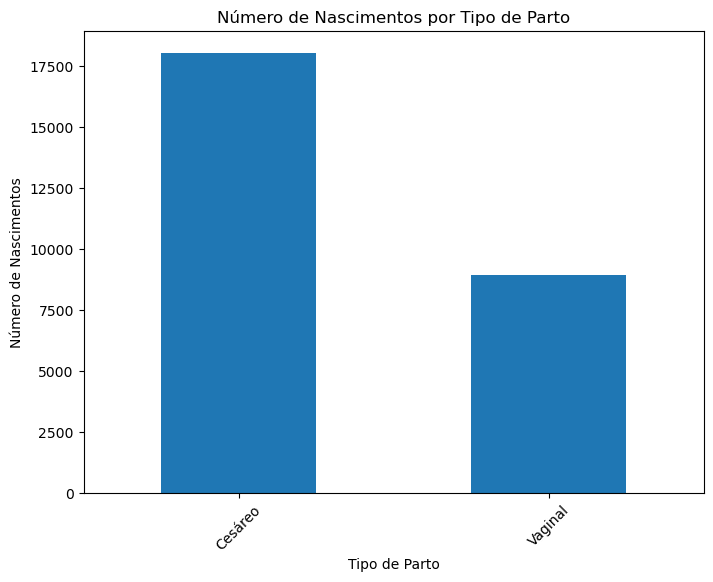

Tipo de parto mais comum:
PARTO
Cesáreo    18036
Name: count, dtype: int64


In [11]:
tipos_parto = sinasc_raw['PARTO'].value_counts()

plt.figure(figsize=(8, 6))
tipos_parto.plot(kind='bar')
plt.title('Número de Nascimentos por Tipo de Parto')
plt.xlabel('Tipo de Parto')
plt.ylabel('Número de Nascimentos')
plt.xticks(rotation=45)
plt.show()

print("Tipo de parto mais comum:")
print(tipos_parto.head(1))